In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [2]:
df = pd.read_csv('Resources/train.csv')  # Replace with your local path if needed
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Extract title from name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\the_a\AppData\Local\Temp\ipykernel_14332\839286812.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [4]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# # Save cleaned dataset to CSV for pgAdmin import
df_cleaned = df.copy()
# df_cleaned.to_csv('titanic_cleaned.csv', index=False)
# print("✅ Exported: titanic_cleaned.csv")

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categoricals
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Title'] = le.fit_transform(df['Title'])

# Normalize numeric columns
scaler = StandardScaler()
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])

C:\Users\the_a\AppData\Local\Temp\ipykernel_14332\1083848343.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\the_a\AppData\Local\Temp\ipykernel_14332\1083848343.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [5]:
X = df.drop(columns='Survived')
y = df['Survived']
y_flipped = 1 - y  # "NotSurvived" instead of "Survived"

X_train, X_test, y_train, y_test = train_test_split(X, y_flipped, test_size=0.2, random_state=42)

In [ ]:
# Model training and evaluation

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42)
}

model_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    model_results.append({'Model': name, 'Accuracy': round(acc * 100, 2)})
    print(f"📌 {name}\nAccuracy: {acc:.2f}")
    print(classification_report(y_test, preds))

results_df = pd.DataFrame(model_results)

📌 Logistic Regression
Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        74
           1       0.82      0.85      0.83       105

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

📌 K-Nearest Neighbors
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        74
           1       0.81      0.88      0.84       105

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

📌 Decision Tree
Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        74
           1       0.79      0.90      0.84       105

    accuracy                           0.80       179
   macro avg       0.81

In [7]:
# Use best model (example: Decision Tree)
best_model = models['Decision Tree']
y_pred = best_model.predict(X_test)

# Revert flipped labels to real Survived status
real_y_test = 1 - y_test

# Predicted NotSurvived but actually Survived = unexpected beneficiaries
predicted_not_survived = y_pred == 1
actually_survived = real_y_test == 1
beneficiaries_index = X_test[predicted_not_survived & actually_survived].index

beneficiaries_df = df.loc[beneficiaries_index]
beneficiaries_df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Survived']].head()

,Pclass,Sex,Age,Fare,FamilySize,Survived
709,3,1,-0.104637,-0.341452,0.679295,1
621,1,1,0.971260,0.409741,0.059160,1
447,1,1,0.356462,-0.113846,-0.560975,1
192,3,0,-0.796286,-0.490280,0.059160,1
673,2,1,0.125912,-0.386671,-0.560975,1


In [8]:
# Exporting results to CSV
# Create export folder if it doesn't exist
export_folder = 'Exports'
os.makedirs(export_folder, exist_ok=True)

# Ensure cleaned version of df exists
df_cleaned = df.copy()

# Export the three main DataFrames
df_cleaned.to_csv(os.path.join(export_folder, 'titanic_cleaned.csv'), index=False)
results_df.to_csv(os.path.join(export_folder, 'model_results.csv'), index=False)
beneficiaries_df.to_csv(os.path.join(export_folder, 'beneficiary_survivors.csv'), index=False)

# Confirm location
print("✅ All CSVs exported to folder:", os.path.abspath(export_folder))


✅ All CSVs exported to folder: c:\Users\the_a\Documents\Projects\Capstone_Project_Data_Viz\Exports


In [9]:
beneficiaries_df.head()  # Display the beneficiaries DataFrame

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
709,1,3,1,-0.104637,1,1,-0.341452,0,8,0.679295
621,1,1,1,0.971260,1,0,0.409741,2,12,0.059160
447,1,1,1,0.356462,0,0,-0.113846,2,12,-0.560975
192,1,3,0,-0.796286,1,0,-0.490280,2,9,0.059160
673,1,2,1,0.125912,0,0,-0.386671,2,12,-0.560975


📂 Cleaned Titanic Data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,1,-0.565736,1,0,-0.502445,2,12,0.059160
1,1,1,0,0.663861,1,0,0.786845,0,13,0.059160
2,1,3,0,-0.258337,0,0,-0.488854,2,9,-0.560975
3,1,1,0,0.433312,1,0,0.420730,2,13,0.059160
4,0,3,1,0.433312,0,0,-0.486337,2,12,-0.560975


📂 Model Evaluation Results


,Model,Accuracy
0,Logistic Regression,79.89
1,K-Nearest Neighbors,81.01
2,Decision Tree,79.89


📂 Unexpected Survivors


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,3,1,-0.104637,1,1,-0.341452,0,8,0.679295
1,1,1,1,0.971260,1,0,0.409741,2,12,0.059160
2,1,1,1,0.356462,0,0,-0.113846,2,12,-0.560975
3,1,3,0,-0.796286,1,0,-0.490280,2,9,0.059160
4,1,2,1,0.125912,0,0,-0.386671,2,12,-0.560975


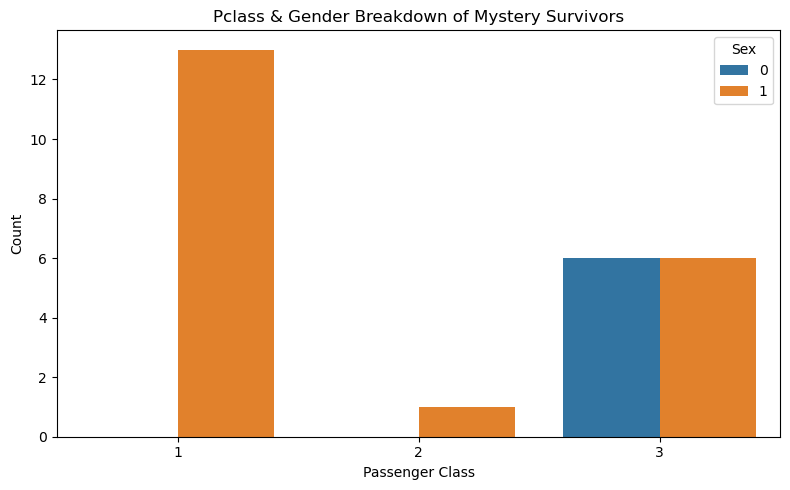

In [13]:

# 🔁 Load exported CSVs from the Exports/ folder
df_cleaned = pd.read_csv('Exports/titanic_cleaned.csv')
results_df = pd.read_csv('Exports/model_results.csv')
beneficiaries_df = pd.read_csv('Exports/beneficiary_survivors.csv')

# ✅ Preview data
print("📂 Cleaned Titanic Data")
display(df_cleaned.head())

print("📂 Model Evaluation Results")
display(results_df)

print("📂 Unexpected Survivors")
display(beneficiaries_df.head())

# 📊 Visualize: Pclass & Gender of mystery survivors
plt.figure(figsize=(8, 5))
sns.countplot(data=beneficiaries_df, x='Pclass', hue='Sex')
plt.title("Pclass & Gender Breakdown of Mystery Survivors")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
# # from sqlalchemy import create_engine

# # # PostgreSQL login credentials
# db_user = 'postgres'           # typically 'postgres'
# db_password = 'postgres'       # the password you created
# db_host = 'localhost'
# db_port = '5432'                    
# db_name = 'Titanic Predictions SQL DB'

# # Create the connection string
# connection_string = f'postgresql+pg8000://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# # Create engine for SQLAlchemy
# engine = create_engine(connection_string)

In [ ]:
# # Save cleaned Titanic dataset to a table called 'titanic_cleaned'
# df_cleaned.to_sql('titanic_cleaned', engine, if_exists='replace', index=False)
# print("✅ Cleaned data saved to PostgreSQL.")

In [ ]:
# # Save model evaluation results (accuracy, model name, etc.)
# results_df.to_sql('model_results', engine, if_exists='replace', index=False)
# print("✅ Model results saved to PostgreSQL.")

In [ ]:
# engine.dispose()
# print("✅ Connection closed.")

* how to check if sql is working!  go into pg admin and test this code in the db
* SELECT * FROM titanic_cleaned LIMIT 10;
* SELECT * FROM model_results;